<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/title.png' width=500/></center>

<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/practice3.png' width=300/></center>

<center>본 실습에서 요구하는 내용 외에도 다양한 내용을 스스로 추가하여  탐색하고 분석해 보기를 권고합니다.</center>

# 서울 공공 자전거 이용 현황

<img src='https://raw.githubusercontent.com/Jangrae/img/master/seoul_bike.png' width="650" align="left">

## 1.환경 설정

- 데이터 탐색과 전처리를 하기 전 라이브러리와 파일을 읽어옵니다.
- 시각화에 한글이 포함된 경우 이에 대한 설정을 진행합니다.

**1) 한글 설정**

- Jupyter Notebook 시각화에 한글이 표시되게 설정합니다.

In [60]:
# 라이브러리 불러오기
import matplotlib 
import matplotlib.pyplot as plt

# 폰트설정 - matplotlib 한글폰트
matplotlib.font_manager._rebuild()
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

**2) 라이브러리 불러오기**

- 사용할 라이브러리를 불러옵니다.

In [61]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

**3) 데이터 읽어오기**

- 다음 경로의 파일을 읽어와 bike 데이터프레임을 만듭니다.
- 파일 경로: 'https://raw.githubusercontent.com/Jangrae/csv/master/seoul_bike_202106.csv'
- 단축 경로: 'https://bit.ly/SeoulBikeFile'
- Decoding 오류가 발생하면 encoding='CP949' 옵션을 지정해 불러옵니다.

In [62]:
# 데이터 읽어오기
path ='https://bit.ly/SeoulBikeFile'
bike = pd.read_csv(path, encoding='CP949')

## 2.데이터 탐색

다음과 같은 정보 확인을 통해 처리할 대상 데이터를 이해합니다.
- 상/하위 데이터 확인
- 데이터프레임 크기 확인
- 열 이름, 데이터 형식, 값 개수 등 확인
- 기초 통계정보 확인
- 결측치 확인
- 범주형 데이터 확인
- 개별 열 값 상세 확인 등

**1) 상/하위 데이터 확인**

- 상/하위 데이터를 확인합니다.

In [4]:
# 상위 5개 행 확인
bike.head()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,2021-06,3,중랑센터,일일(회원),F,AGE_003,1,11.23,0.12,506.18,17
1,2021-06,3,중랑센터,정기,NaN,AGE_003,2,107.00,0.79,3377.56,17
2,2021-06,3,중랑센터,정기,M,AGE_002,6,352.15,3.18,13680.88,81
3,2021-06,3,중랑센터,정기,M,AGE_004,3,61.55,0.50,2158.72,21
4,2021-06,3,중랑센터,정기,M,AGE_005,3,125.30,1.10,4722.60,36


In [5]:
# 하위 5개 행 확인
bike.tail()

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
119855,2021-06,88888,88888.영남배송,정기,F,AGE_002,1,0.00,0.00,0.00,9
119856,2021-06,88888,88888.영남배송,정기,M,AGE_002,2,218.93,1.97,8505.59,79
119857,2021-06,88888,88888.영남배송,정기,M,AGE_003,1,8.32,0.07,283.84,41
119858,2021-06,99997,도봉정비센터,일일(회원),M,AGE_005,1,NaN,NaN,0.00,4
119859,2021-06,99999,99999. 영남단말기정비,정기,NaN,AGE_008,6,0.00,0.00,0.00,235


**2) 열 데이터 형식, 값 개수**

- 어떤 열이 있고, 몇 개의 값들을 갖는지, 데이터 형식은 어떠한 지 확인합니다.

In [6]:
# 열 정보 확인
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119860 entries, 0 to 119859
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   대여일자     119860 non-null  object 
 1   대여소번호    119860 non-null  int64  
 2   대여소명     119860 non-null  object 
 3   대여구분코드   119860 non-null  object 
 4   성별       67702 non-null   object 
 5   연령대코드    119860 non-null  object 
 6   이용건수     119860 non-null  int64  
 7   운동량      119698 non-null  float64
 8   탄소량      119698 non-null  float64
 9   이동거리(M)  119860 non-null  float64
 10  이용시간(분)  119860 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 10.1+ MB


**3) 기초통계정보 확인**

- 기초통계정보를 통해 데이터 분포 상황을 살펴봅니다.

In [7]:
# 기초통계정보 
bike.describe()

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,119860.000000,119860.000000,1.196980e+05,119698.000000,1.198600e+05,119860.000000
mean,1902.517437,28.870407,8.869655e+03,20.455260,8.805111e+04,749.706699
std,1453.116590,56.813723,1.335818e+06,42.948015,1.850256e+05,1504.361808
min,3.000000,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,806.000000,3.000000,2.032625e+02,1.840000,7.870930e+03,76.000000
50%,1640.000000,9.000000,7.376450e+02,6.590000,2.830418e+04,255.000000
75%,2654.000000,30.000000,2.454695e+03,21.720000,9.339718e+04,812.000000
max,99999.000000,1617.000000,4.000089e+08,2376.180000,1.024219e+07,87111.000000


→ 지수법으로 표현되어 있어서 보기가 어렵다

**5) (추가) 기초통계정보 확인**

- 지수법을 생략하여 기초통계정보를 확인합니다.

In [67]:
# 기초통계정보
bike.describe().apply(lambda x: x.apply('{0:,.2f}'.format))

,대여소번호,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
count,"119,860.00","119,860.00","119,698.00","119,698.00","119,860.00","119,860.00"
mean,"1,902.52",28.87,"8,869.65",20.46,"88,051.11",749.71
std,"1,453.12",56.81,"1,335,817.77",42.95,"185,025.59","1,504.36"
min,3.00,1.00,0.00,0.00,0.00,0.00
25%,806.00,3.00,203.26,1.84,"7,870.93",76.00
50%,"1,640.00",9.00,737.64,6.59,"28,304.18",255.00
75%,"2,654.00",30.00,"2,454.70",21.72,"93,397.18",812.00
max,"99,999.00","1,617.00","400,008,918.69","2,376.18","10,242,192.30","87,111.00"


**4) 결측치 확인**

- 결측치가 있는 지 확인합니다.

In [8]:
# 결측치 확인
bike.isnull().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52158
연령대코드          0
이용건수           0
운동량          162
탄소량          162
이동거리(M)        0
이용시간(분)        0
dtype: int64

**5) 범주형 데이터 확인**

- 범주형 값을 갖는 열의 범주 값과 그 값의 개수를 확인합니다.

- 대여구분코드

In [9]:
# 대여구분코드
bike['대여구분코드'].value_counts()

정기         60530
일일(회원)     45514
단체          8914
일일(비회원)     2804
10분이용권      2098
Name: 대여구분코드, dtype: int64

- 성별

In [10]:
# 성별
bike['성별'].value_counts()

M    35383
F    32290
m       19
f       10
Name: 성별, dtype: int64

- 연령대코드

In [11]:
# 연령대코드
bike['연령대코드'].value_counts()

AGE_002    21982
AGE_003    19610
AGE_008    19395
AGE_004    18575
AGE_001    14720
AGE_005    14555
AGE_006     8180
AGE_007     2843
Name: 연령대코드, dtype: int64

- 대여소명

In [12]:
# 대여소명
bike['대여소명'].value_counts()

502. 뚝섬유원지역 1번출구 앞    85
207. 여의나루역 1번출구 앞     85
152. 마포구민체육센터 앞       84
2715.마곡나루역 2번 출구      81
583. 청계천 생태교실 앞       79
                      ..
상암센터 정비실               2
천호센터                   1
도봉정비센터                 1
4322.서울추모공원 입구         1
99999. 영남단말기정비         1
Name: 대여소명, Length: 2471, dtype: int64

**6) (추가) 정렬해서 확인**

- 이용시간을 기준으로 내림차순 정렬해 확인합니다.

In [69]:
# 내림차순 정렬 ← ascending=False
bike.sort_values(by='이용시간(분)', ascending=False)

,대여일자,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
4894,2021-06,207,207. 여의나루역 1번출구 앞,일일(회원),NaN,AGE_002,1562,251219.34,2376.18,10242192.30,87111
17904,2021-06,502,502. 뚝섬유원지역 1번출구 앞,일일(회원),NaN,AGE_002,1617,227070.15,2115.66,9120082.48,75174
4890,2021-06,207,207. 여의나루역 1번출구 앞,일일(비회원),NaN,AGE_008,1067,181852.96,1638.97,7064993.26,70728
4912,2021-06,207,207. 여의나루역 1번출구 앞,일일(회원),F,AGE_008,1079,163433.02,1583.67,6825716.01,67512
4919,2021-06,207,207. 여의나루역 1번출구 앞,일일(회원),M,AGE_008,952,186452.60,1548.97,6676896.36,55345
...,...,...,...,...,...,...,...,...,...,...,...
23249,2021-06,631,631. 답십리역 1번출구,10분이용권,F,AGE_008,1,0.00,0.00,0.10,0
10783,2021-06,334,334. 종로3가역 2번출구 뒤,10분이용권,NaN,AGE_002,1,0.00,0.00,0.00,0
21664,2021-06,588,588. 뚝섬 유원지역,단체,M,AGE_002,1,0.00,0.00,0.00,0
119800,2021-06,9988,천호센터,정기,NaN,AGE_002,1,0.00,0.00,0.00,0


## 3.데이터 전처리

전처리 과정에서 다음과 같은 처리를 할 수 있습니다.

- 결측치 처리
- 값 변경
- 열 추가
- 불필요한 열 제거
- 열 이름 변경
- 데이터 통합(연결 또는 조인)
- 가변수화 등

**1) 결측치 제거**

- 운동량, 탄소량 열은 결측치가 있는 행이 동일하고 몇 건 안되니 제거합니다.

In [70]:
# 결측치 제거 - 운동량, 탄소량 열이 결측치인 행 제거
bike.dropna(subset=['운동량', '탄소량'], axis=0, inplace=True)

# 확인
bike.isna().sum()

대여일자           0
대여소번호          0
대여소명           0
대여구분코드         0
성별         52070
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리(M)        0
이용시간(분)        0
dtype: int64

**2) 결측치 채우기**

- 성별 열은 결측치가 너무 많습니다. 
- 성별별 분석 시 '남','녀' 외에 '기타'로 분석되게 'X'로 채웁니다.

In [71]:
# 결측치 제거
bike['성별'].fillna('X', axis=0, inplace=True)

# 확인
bike.isna().sum()

대여일자       0
대여소번호      0
대여소명       0
대여구분코드     0
성별         0
연령대코드      0
이용건수       0
운동량        0
탄소량        0
이동거리(M)    0
이용시간(분)    0
dtype: int64

**3) 데이터 변경**

- 성별이 소문자 m. f인 값을 대문자 M. F로 변경합니다.

In [72]:
# 성별 소문자 --> 대문자 변경 
# 방법1
bike.loc[bike['성별'] == 'm', '성별'] = 'M' 
bike.loc[bike['성별'] == 'f', '성별'] = 'F'

# 확인
bike['성별'].value_counts()

X    52070
M    35367
F    32261
Name: 성별, dtype: int64

In [73]:
# 성별 소문자 --> 대문자 변경 
# 방법2
bike['성별'] = bike['성별'].str.replace('m', 'M')
bike['성별'] = bike['성별'].str.replace('f', 'F')

# 확인
bike['성별'].value_counts()

X    52070
M    35367
F    32261
Name: 성별, dtype: int64

- 연령대 코드를 이해하기 쉽게 10대~80대로 변경합니다.

In [74]:
# 연령대 데이터 변경
bike['연령대코드'] = bike['연령대코드'].str[-1] + '0대'

# 확인
bike['연령대코드'].value_counts()

20대    21962
30대    19589
80대    19373
40대    18549
10대    14697
50대    14526
60대     8166
70대     2836
Name: 연령대코드, dtype: int64

**4) 불필요한 열 제거**

- 분석에 큰 의미가 없는 대여일자, 대여소번호 열은 제거합니다.

In [75]:
# 대여일자, 대여소번호 제거
bike.drop(['대여일자', '대여소번호'], axis=1, inplace=True)

# 확인
bike.head()

,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리(M),이용시간(분)
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


**5) 열 이름 변경**

- 분석에 편의를 위해 열 이름을 간단명료하게 변경합니다.
    - 대여소명 --> 대여소
    - 대여구분코드 --> 대여구분
    - 연령대코드  --> 연령대
    - 이동거리(M) --> 이동거리
    - 이용시간(분) --> 이용시간

In [76]:
# 열 이름 변경
cols = {'대여소명':'대여소', '대여구분코드':'대여구분',
       '연령대코드':'연령대', '이동거리(M)':'이동거리',
       '이용시간(분)':'이용시간'}
bike.rename(columns=cols, inplace=True)

# 확인
bike.head()

,대여소,대여구분,성별,연령대,이용건수,운동량,탄소량,이동거리,이용시간
0,중랑센터,일일(회원),F,30대,1,11.23,0.12,506.18,17
1,중랑센터,정기,X,30대,2,107.00,0.79,3377.56,17
2,중랑센터,정기,M,20대,6,352.15,3.18,13680.88,81
3,중랑센터,정기,M,40대,3,61.55,0.50,2158.72,21
4,중랑센터,정기,M,50대,3,125.30,1.10,4722.60,36


## 4.데이터 분석

- 데이터를 집계하고 간단히 시각화하여 분석합니다.
- 연속형 값은 선 그래프, 범주형 값은 막대 그래프로 시각화함이 일반적입니다.

**1) 대여구분별 이용 건수**

- 대여구분별 이용 건수를 막대 그래프로 시각화해 확인합니다.
- 이용건수 합 단위가 크니 1,000으로 나누어 시각화에 사용합니다.

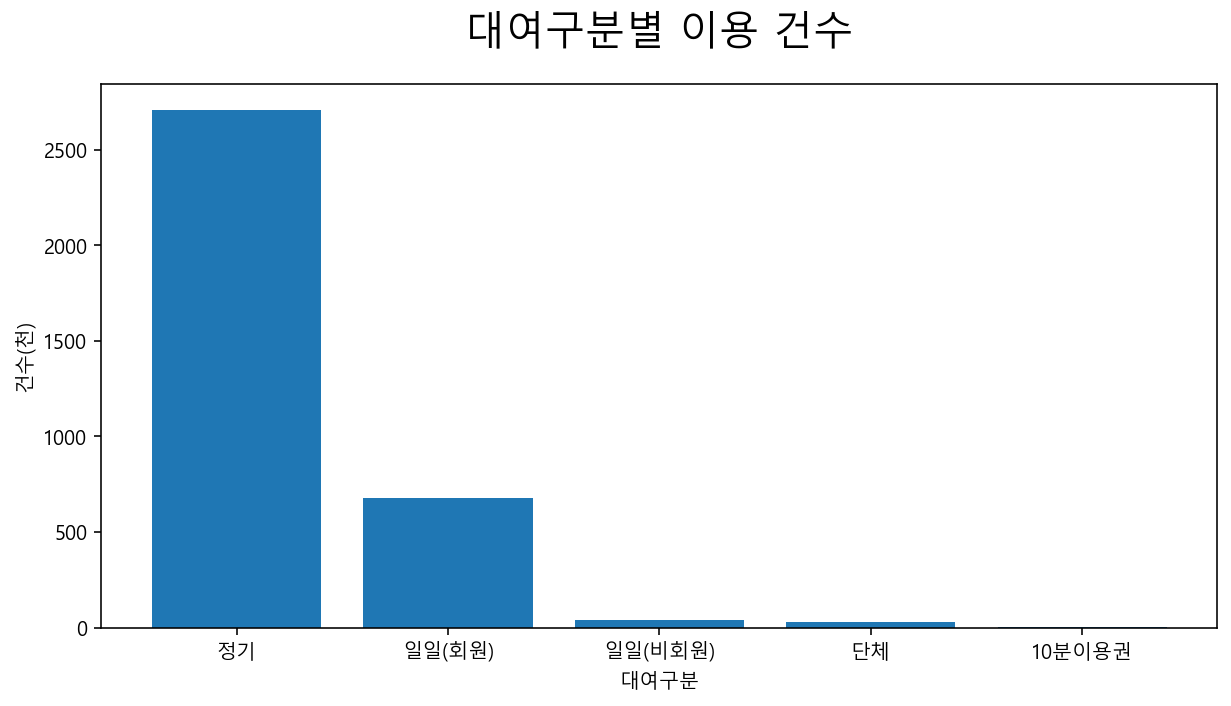

In [82]:
# 대여구분별 이용건수
tmp = bike.groupby(by='대여구분', as_index=False)[['이용건수']].sum()
tmp['이용건수'] = tmp['이용건수']/1000
tmp = tmp.sort_values(by=['이용건수'], ascending=False)

## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['대여구분'], tmp['이용건수'])

# 차트 제목
plt.title('대여구분별 이용 건수', fontsize=20, pad=20)

# 라벨
plt.xlabel('대여구분')
plt.ylabel('건수(천)')

plt.show()

**2) 대여소별 이용 건수 TOP 10**

- 대여소별 이용 건수 TOP 10을 막대 그래프로 시각화해 확인합니다.

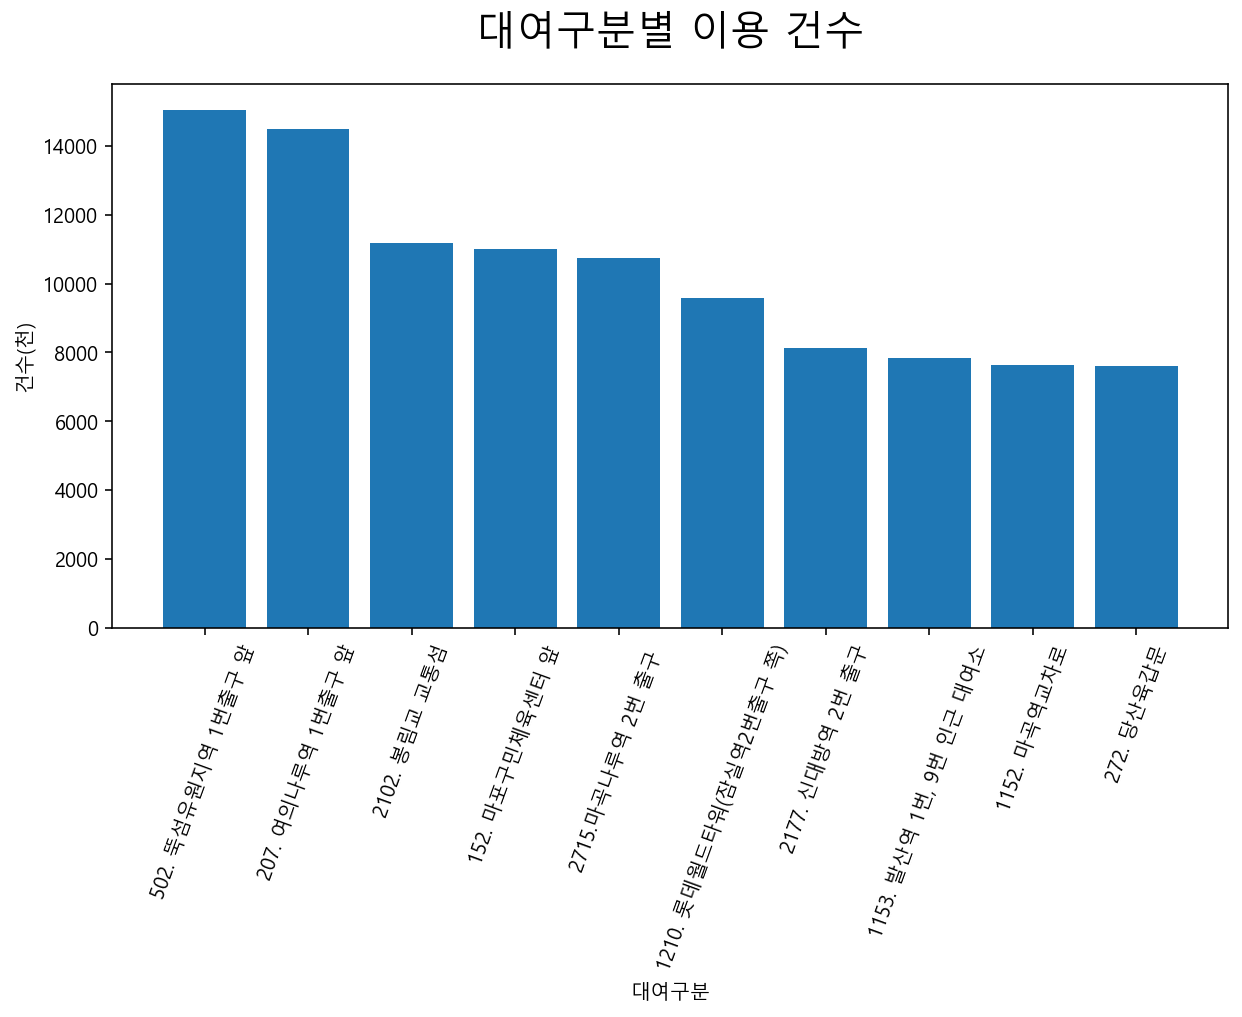

In [85]:
# 대여소별 이용건수 TOP 10
tmp = bike.groupby(by=['대여소'], as_index=False).sum()
tmp = tmp.sort_values(by='이용건수', ascending=False)
tmp.reset_index(drop=True, inplace=True)
tmp = tmp.head(10)


## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['대여소'], tmp['이용건수'])

# 차트 제목
plt.title('대여구분별 이용 건수', fontsize=20, pad=20)

# 라벨
plt.xlabel('대여구분')
plt.ylabel('건수(천)')

# x축 레이블 회전 - x 축 값을 기울여 표시
plt.xticks(rotation=70) 

plt.show()

**3) (옵션) 연령대별 이용 건수**

- 연령대별 이용 건수를 막대 그래프로 시각화해 확인합니다.

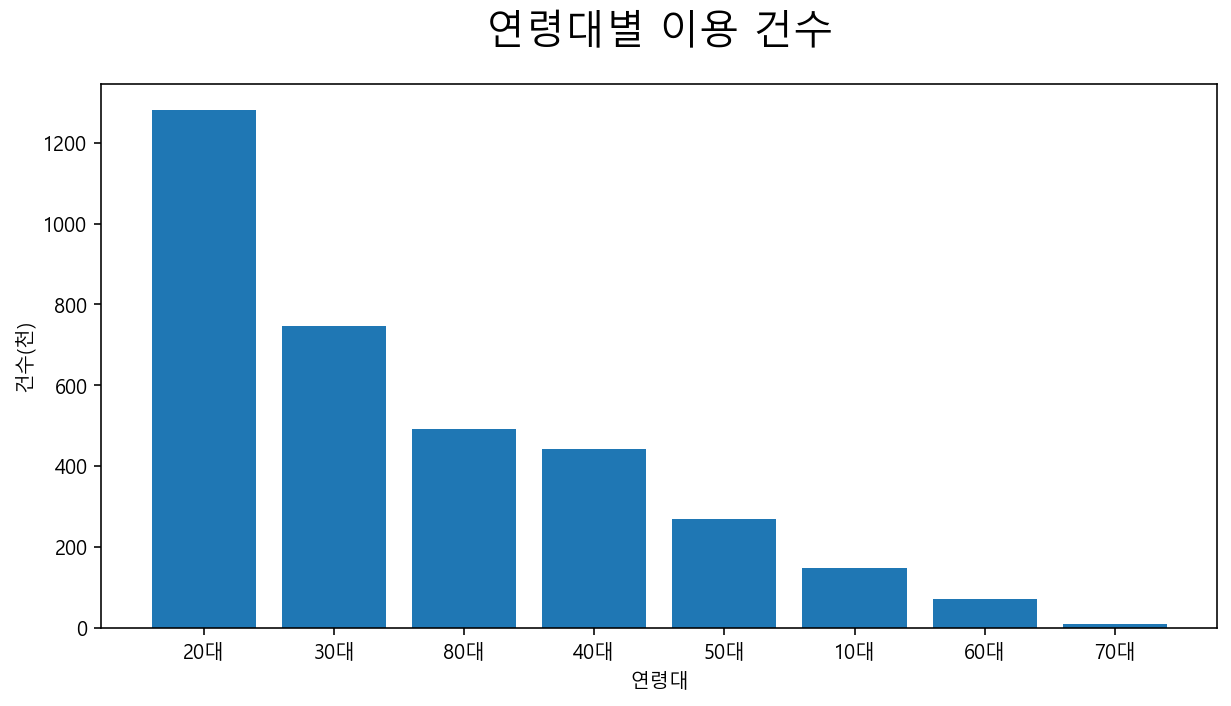

In [96]:
# 연령대별 이용건수
tmp = bike.groupby(by=['연령대'], as_index=False).sum()
tmp['이용건수'] = tmp['이용건수'] / 1000
tmp = tmp.sort_values(by='이용건수', ascending=False)
tmp.reset_index(drop=True, inplace=True)
tmp = tmp.head(10)


## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['연령대'], tmp['이용건수'])

# 차트 제목
plt.title('연령대별 이용 건수', fontsize=20, pad=20)

# 라벨
plt.xlabel('연령대')
plt.ylabel('건수(천)')

# 축의 tick 포멧 편집
plt.ticklabel_format(axis='y', style='plain') 

plt.show()

**4) (옵션) 성별별 이용 건수**

- 성별별 이용 건수를 막대 그래프로 시각화해 확인합니다.

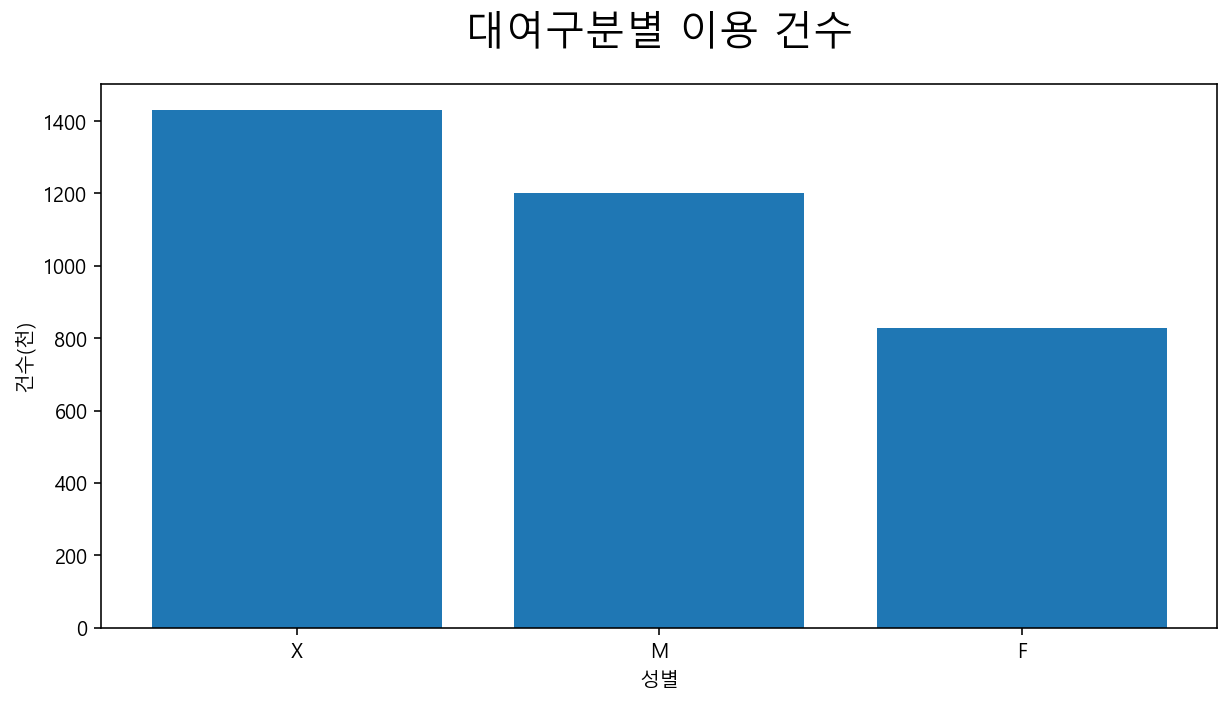

In [91]:
# 성별별 이용건수
tmp = bike.groupby(by=['성별'], as_index=False)[['이용건수']].sum()
tmp['이용건수'] = tmp['이용건수'] / 1000
tmp = tmp.sort_values(by='이용건수', ascending=False)
tmp.reset_index(drop=True, inplace=True)
tmp = tmp.head(10)


## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp['성별'], tmp['이용건수'])

# 차트 제목
plt.title('대여구분별 이용 건수', fontsize=20, pad=20)

# 라벨
plt.xlabel('성별')
plt.ylabel('건수(천)')

plt.show()

**6) (추가) 평균 이용시간 TOP 25**

- 평균이용시간 열을 추가하여 이 값을 기분으로 내림차순 정렬해 상위 25개를 시각화해 확인합니다.

In [97]:
# 성별별 이용건수
bike['평균이용시간'] = bike['이용시간'] / bike['이용건수']
tmp = bike.sort_values(by='평균이용시간', ascending=False).head(25)
tmp.reset_index(drop=True, inplace=True)
tmp.head()

,대여소,대여구분,성별,연령대,이용건수,운동량,탄소량,이동거리,이용시간,평균이용시간
0,1066.생태공원앞 교차로(조명탑),일일(회원),X,10대,1,402.45,4.07,17522.28,669,669.0
1,417. DMC역 2번출구 옆,정기,X,10대,1,104.73,0.71,3040.00,651,651.0
2,3636. 삼성중앙역·플래티넘아파트 정류소,10분이용권,F,80대,1,8.74,0.11,460.00,594,594.0
3,1155. 기쁜우리복지관,10분이용권,M,80대,1,40.27,0.29,1240.00,590,590.0
4,511. 서울숲역 4번 출구 옆,단체,F,50대,2,242.50,2.18,9421.25,1045,522.5


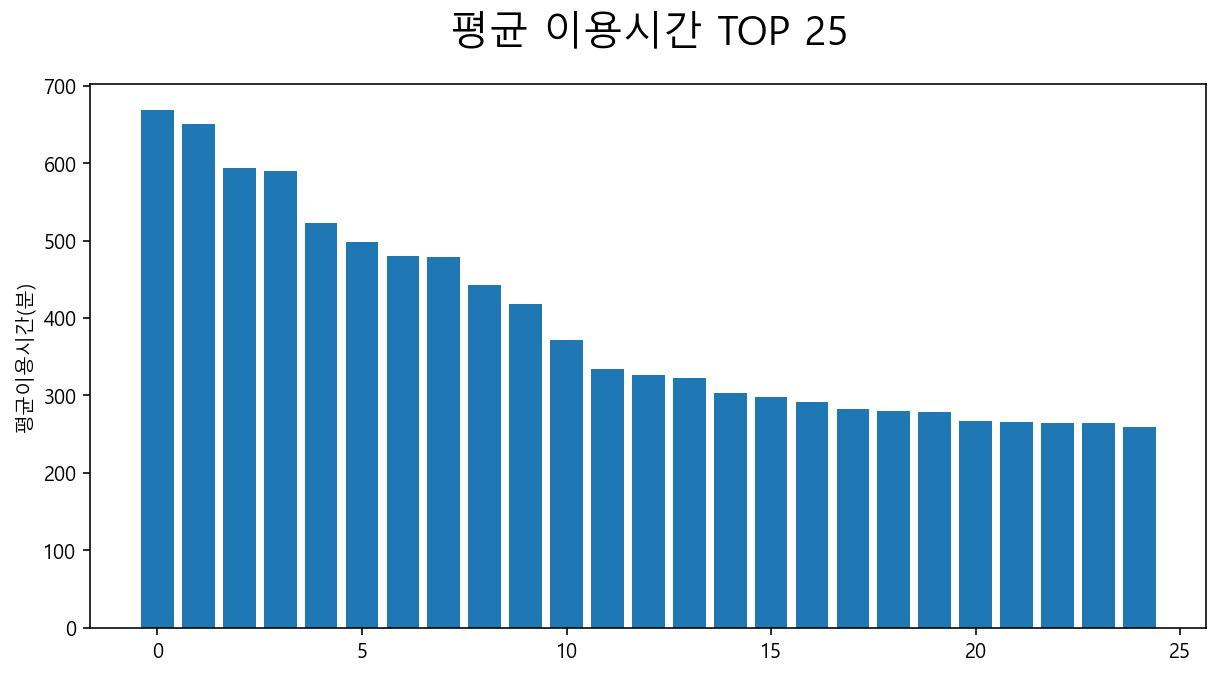

In [100]:
## 시각화 ##

# 그래프 크기
plt.figure(figsize=(10,5))

# 막대그래프
plt.bar(tmp.index, tmp['평균이용시간'])

# 차트 제목
plt.title('평균 이용시간 TOP 25', fontsize=20, pad=20)

# 라벨
plt.ylabel('평균이용시간(분)')

plt.show()

## 5.정리

- 분석을 통해 확인한 내용을 정리합니다.


**1) 의견**

- 정기 이용권 사용자가 가장 많이 이용하고 있습니다.
- 뚝섬 유원지 1번 출구 앞에서 가장 많은 대여가 이루어졌습니다.
- 20대가 가장 많이 이용하고 있습니다.
- 여자보다 남자가 조금 더 많이 사용합니다.
- 성별이 구분되지 않은 정보가 많습니다.

**2) 기타**

- 
- 
- 
- 
- 